In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [9]:
from scipy import stats

In [10]:
with open('Sample_0012022-06-23 13.40.50.487_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-06-23 13:40:50.488841,300.21920,2137.05266,0
1,2022-06-23 13:40:50.498441,300.21920,2137.05266,0
2,2022-06-23 13:40:50.508041,300.21920,2137.05266,0
3,2022-06-23 13:40:50.517641,300.21920,2137.05266,0
4,2022-06-23 13:40:50.527241,300.21884,2137.05266,0
...,...,...,...,...
443000,2022-06-23 14:51:43.280902,299.48201,2137.05266,0
443001,2022-06-23 14:51:43.290502,299.48201,2137.05266,0
443002,2022-06-23 14:51:43.300102,299.48236,2137.05266,0
443003,2022-06-23 14:51:43.309702,299.48201,2137.05266,0


In [11]:
time = pd.to_datetime(df["Protocol Time Stamp(s)"])

In [12]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


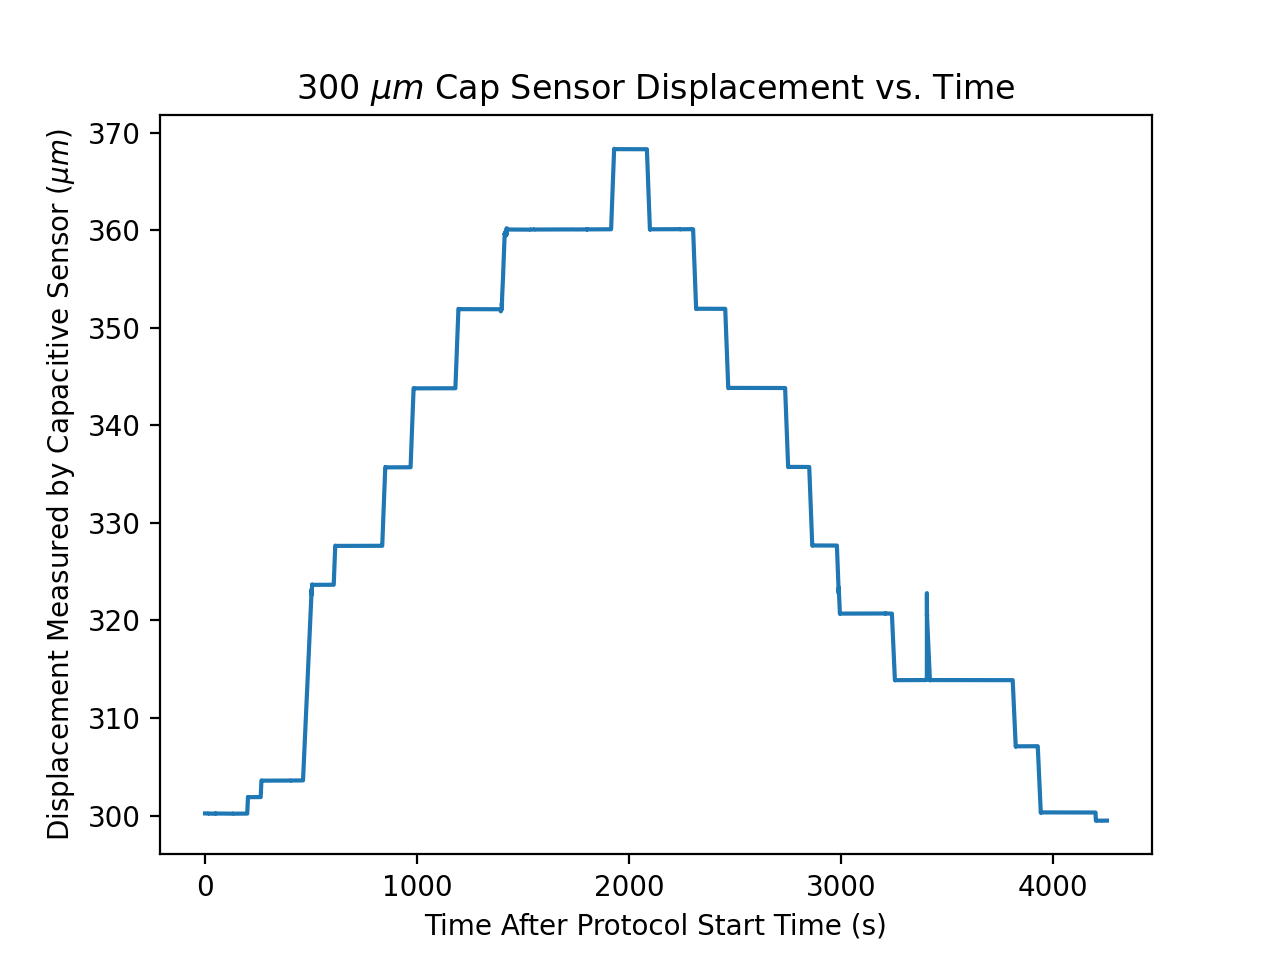

Text(0.5, 1.0, '300 $\\mu m$ Cap Sensor Displacement vs. Time')

In [25]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('300 $\mu m$ Cap Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


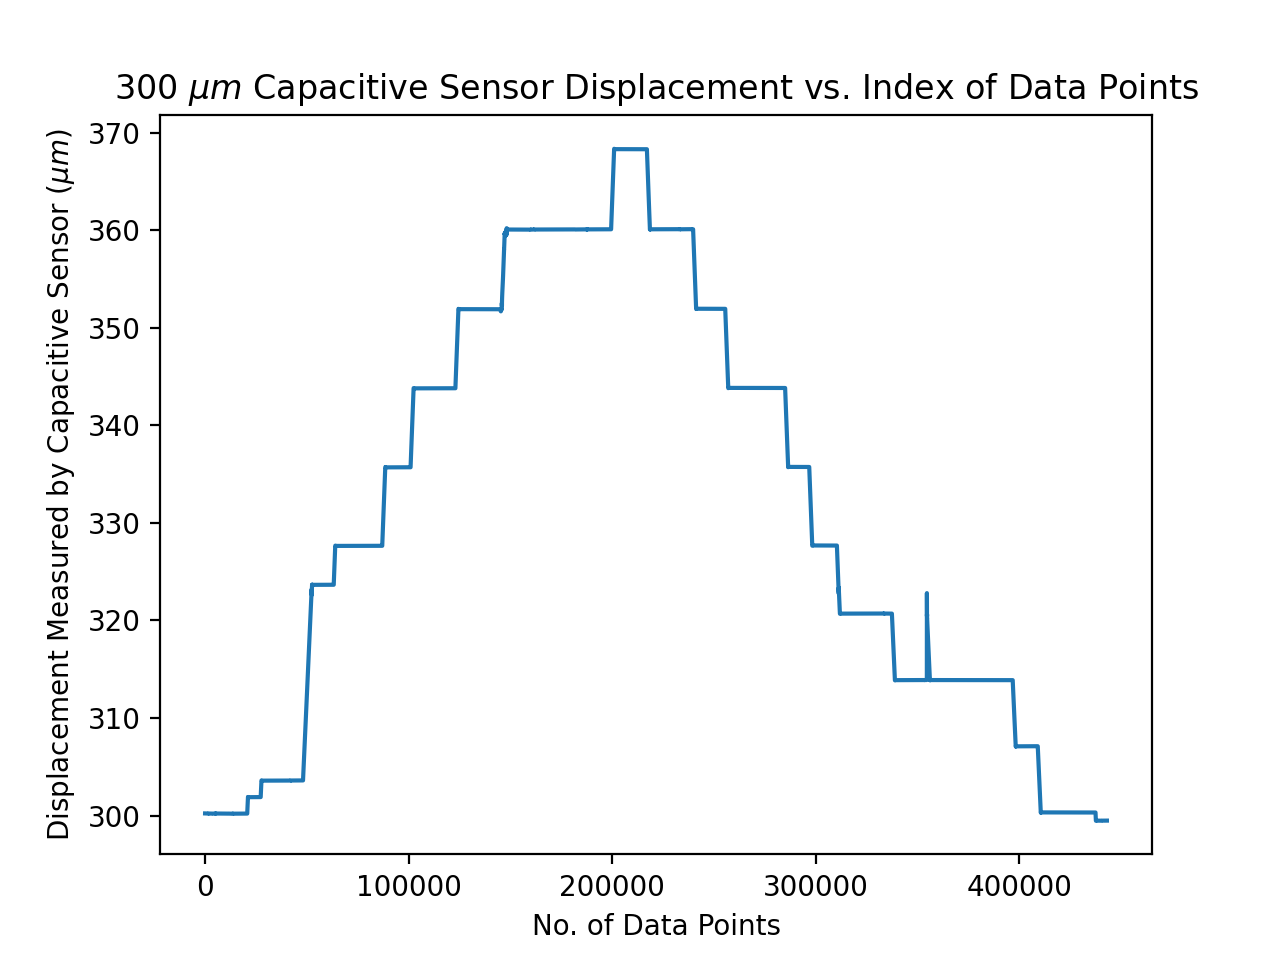

Text(0.5, 1.0, '300 $\\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [22]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])

plt.xlabel('No. of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('300 $\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [14]:
start=130000
end=135000

In [15]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

351.9185760999952
0.0013462132847507765


In [16]:
y = df[" Data channel 1 (µm)"][start:end]
x = (time[start:end] - time[start]).dt.total_seconds()

In [17]:
info = stats.linregress(x,y)
info

LinregressResult(slope=5.184812781207918e-05, intercept=351.91733199611036, rvalue=0.5337187306187714, pvalue=0.0, stderr=1.1620353892071912e-06, intercept_stderr=3.2198379174020204e-05)

<IPython.core.display.Javascript object>


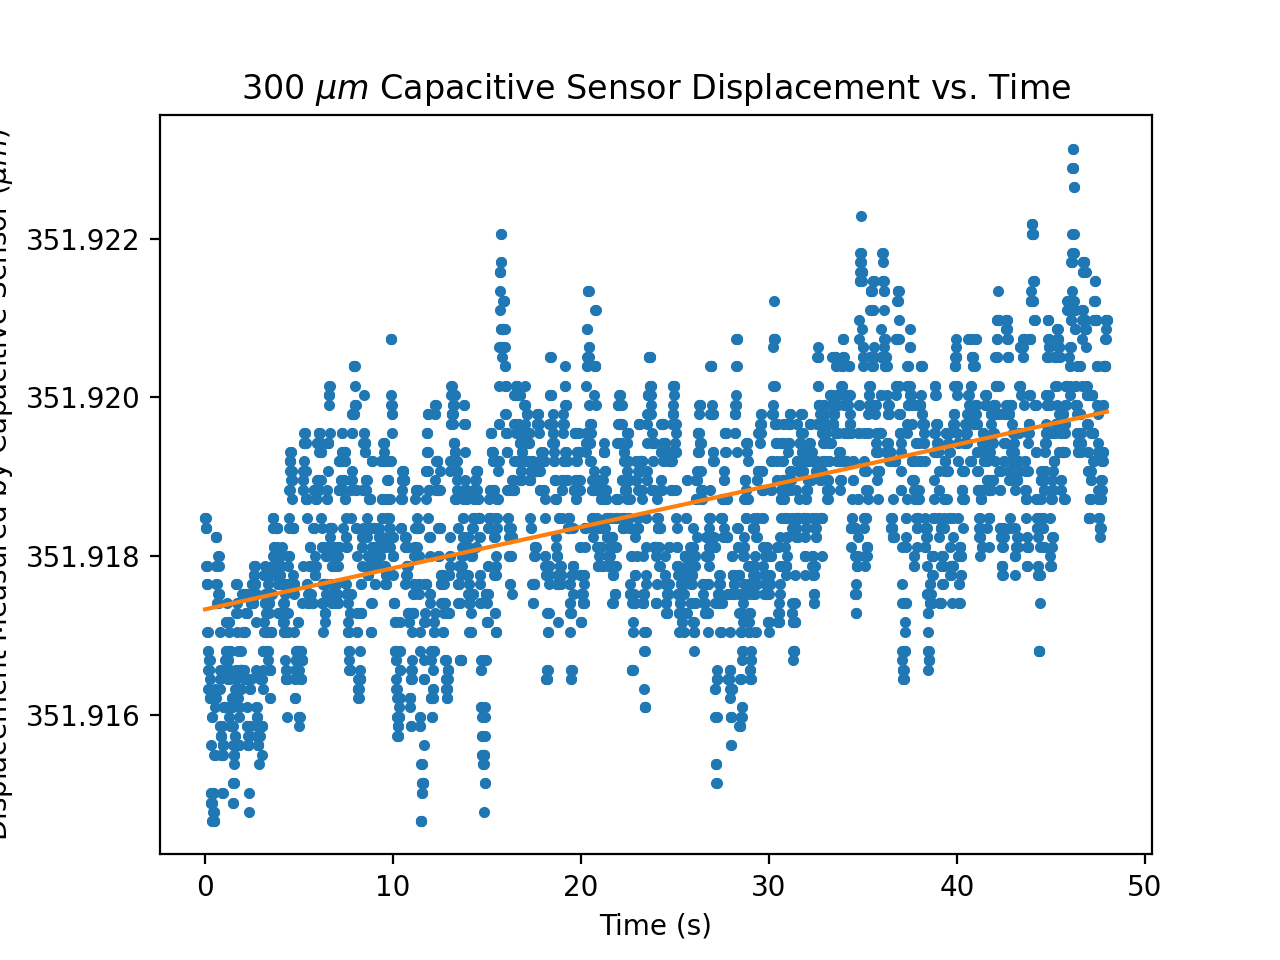

In [24]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('300 $\mu m$ Capacitive Sensor Displacement vs. Time')

plt.ticklabel_format(useOffset=False)